In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#create dataframe

data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#How many people were in each passenger class?

passengers = data.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack()

passengers

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0, 0.5, 'Passenger Count')

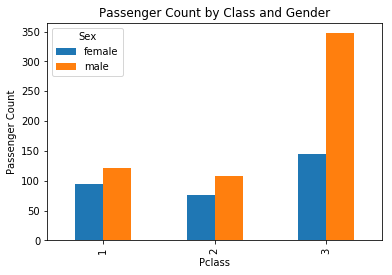

In [5]:
#graph passenger counts

passenger_graph = passengers.plot.bar(title = 'Passenger Count by Class and Gender')
passenger_graph.set_ylabel('Passenger Count')

In [6]:
#Survived by class, gender

deaths = data.groupby(['Pclass', 'Sex','Survived'])['PassengerId'].count().unstack()
deaths.columns = ['Died','Lived']
deaths


Died  Lived
Pclass Sex                
1      female     3     91
       male      77     45
2      female     6     70
       male      91     17
3      female    72     72
       male     300     47

Text(0, 0.5, 'Passenger Count')

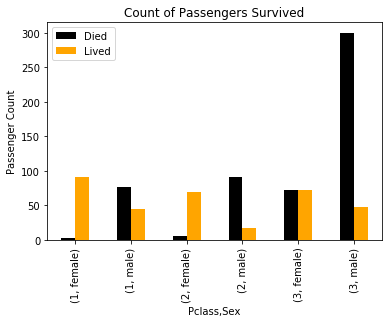

In [7]:
deaths_graph = deaths.plot.bar(color = ['black','orange'], title = 'Count of Passengers Survived')
deaths_graph.set_ylabel('Passenger Count')


In [8]:
#Who survived based on ticket price
prices = data.groupby(['Pclass', 'Survived'])['Fare'].sum().unstack()
prices.columns = ['Died','Lived']
prices

,Died,Lived
Pclass,,
1,5174.7206,13002.6919
2,1882.9958,1918.8459
3,5085.0035,1629.6916


Text(0, 0.5, 'Sum of Fares')

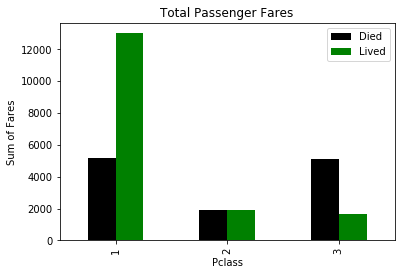

In [9]:
prices_graph = prices.plot.bar(color = ['black','green'], title='Total Passenger Fares')
prices_graph.set_ylabel('Sum of Fares')


In [18]:
no_age = data[data['Age'].isna()]
no_age = no_age.groupby(['Pclass','Sex','Survived'])['PassengerId'].count().unstack()
no_age.columns = ['Died','Lived']

no_age

Died  Lived
Pclass Sex                
1      female   NaN    9.0
       male    16.0    5.0
2      female   NaN    2.0
       male     7.0    2.0
3      female  17.0   25.0
       male    85.0    9.0

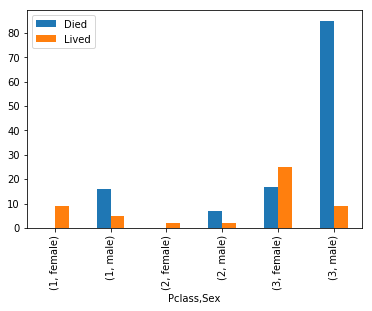

In [19]:
no_age.plot.bar()